In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as c
import matplotlib.pyplot as plt
from scipy.special import erf
import pandas as pd
import matplotlib

from axion_functions import *

Cast data: https://github.com/jesseliuphys/dm_sensitivity/tree/main

IAXO data: https://github.com/cajohare/IAXOmass/tree/master?tab=readme-ov-file

Other limits from Di Luzio et.al 2020 (https://arxiv.org/abs/2003.01100v4) (See table 3)

In [2]:
cast_df = pd.read_table("Data\\Exclusion\\cast.txt", header=None)
cast_df.columns = ["m_a ev", "g gev"]
cast_M_df = pd.read_table("Data\\Exclusion\\cast_highm.txt", header=None)
cast_M_df.columns = ["m_a ev", "g gev"]
iaxo_df = pd.read_table("Data\\Exclusion\\iaxo_plot.txt", header=None)
iaxo_df.columns = ["m_a ev", "g gev"]

For the SABRE plots, I computed the values in another notebook and copied the data over here. This is obviously very stupid and I am sorry ;-;.

Because the number of detections scales linearly with an integer number of years, we have the relation $\frac{g_{n~yr}}{g_{m~yr}} = (\frac{n}{m})^{-1/4}$. This means I only really had to calculate stuff for 3 years, and everything else scales in a simple way like this. Note that because of the annual modulation due to the Sun's position relative to Stawell, this can't be used for a non-integer number of years

In [3]:
def g_ag(mass, en = 2):
    """Finds coupling as a function of mass following the KSVZ model, dependent on E/N"""
    z=0.56
    return np.abs(0.19e-9*(mass)*(en-2*(4+z)/(3*(1+z))))
abs_factor = 3.05/1.23

sabre_3_m = np.array([1e-4, 1e3, 5e3, 10e3])
sabre_3_g = np.array([1.23e-10, 1.23e-10, 1.44e-10, 2.899e-10])
sabre_5_g  = sabre_3_g*(3/5)**(1/4)
sabre_X_g = sabre_3_g*(3/10)**(1/4)

sabre_bg_3 = np.array([4.997561342622905e-10 ,4.997561342622905e-10 ,5.838920449876002e-10,1.1784412733914467e-09])
sabre_bg_5 = np.array([4.72678337009983e-10  ,4.72678337009983e-10  ,5.522555940718993e-10,1.114590943826713e-09])
sabre_bg_X = np.array([4.3596070263798116e-10,4.3596070263798116e-10,5.093564015442831e-10,1.0280095637519384e-09])


sabre_abs_3 = abs_factor*sabre_bg_3 
sabre_abs_5 = abs_factor*sabre_bg_5 
sabre_abs_X = abs_factor*sabre_bg_X

Latex compilation will make the plot look nice but take like 87 years to run BEWARE 

In [7]:
#matplotlib.rcParams.update({"text.usetex": True})

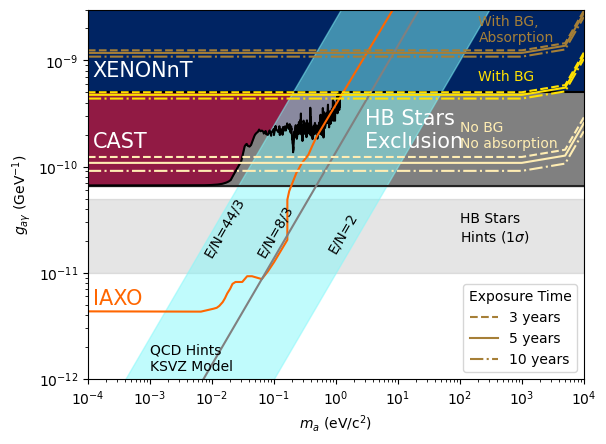

In [4]:
fig,ax = plt.subplots()
mass_axis = np.logspace(-4, 4)

# --- XENON
ax.fill_between((1e-4, 1e4), 5e-10, 3e-9, alpha=1, color="#002463")
ax.hlines(5e-10, 1e-4, 1e4, color="black")
ax.text(1.2e-4, 7e-10, "XENONnT", color="white", fontsize=15)

# --- HB Stars
ax.fill_between((1e-4, 1e4), 0.66e-10, 5e-10, color="gray", alpha=1)
ax.hlines(0.66e-10, 1e-4, 1e4, color="#242424")
ax.text(3, 1.5e-10, "HB Stars \nExclusion", color="white", fontsize=15)

# --- CAST
ax.fill_between(np.array(cast_df["m_a ev"]), 
                np.array(cast_df["g gev"]), 5e-10, color="#911a44")
ax.plot(cast_df["m_a ev"], cast_df["g gev"], color="black")
ax.text(1.2e-4, 1.5e-10, "CAST", color="white", fontsize=15)

# --- IAXO
ax.plot(iaxo_df["m_a ev"], iaxo_df["g gev"], color="#ff6600")
ax.text(1.2e-4, 5e-12, "IAXO", color="#ff6600", fontsize=15)

# --- HB Hints
hb_cut = ax.fill_between((1e-4, 1e4), 0.1e-10, 0.5e-10, color="grey", alpha=0.2)
ax.text(1e2, 2e-11, "HB Stars \nHints (1$\sigma$)")

# --- QCD Hints
ax.plot(mass_axis, g_ag(mass_axis, en=8/3 ), color="grey")
ax.fill_between(mass_axis,g_ag(mass_axis, en=44/3), g_ag(mass_axis, en=2), color="#82f8fa", alpha=0.5)
ax.text(1e-3, 1.2e-12, "QCD Hints\nKSVZ Model")
ax.text(1, 1.5e-11, 'E/N=2', rotation=60, rotation_mode='anchor')
ax.text(1e-2, 1.4e-11, 'E/N=44/3', rotation=60, rotation_mode='anchor')
ax.text(7e-2, 1.4e-11, 'E/N=8/3', rotation=60, rotation_mode='anchor')


# --- SABRE
ax.plot(sabre_3_m, sabre_3_g, color="#ffedb3", ls="dashed")
ax.plot(sabre_3_m, sabre_5_g, color="#ffedb3")
ax.plot(sabre_3_m, sabre_X_g, color="#ffedb3", ls="dashdot")
ax.text(1e2, 1.5e-10, "No BG\nNo absorption", color="#ffedb3")

ax.plot(sabre_3_m, sabre_bg_3, color="#ffe100", ls="dashed")
ax.plot(sabre_3_m, sabre_bg_5, color="#ffe100")
ax.plot(sabre_3_m, sabre_bg_X, color="#ffe100", ls="dashdot")
ax.text(2e2, 6.5e-10, "With BG", color="#ffe100")

ax.plot(sabre_3_m, sabre_abs_3, color="#a67f37", ls="dashed", label="3 years")
ax.plot(sabre_3_m, sabre_abs_5, color="#a67f37",label="5 years")
ax.plot(sabre_3_m, sabre_abs_X, color="#a67f37", ls="dashdot",label="10 years")
ax.text(2e2, 1.5e-9, "With BG,\nAbsorption", color="#a67f37")


plt.legend(title="Exposure Time")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-12, 3e-9)
ax.set_xlim(1e-4 , 1e4)

plt.ylabel("$g_{a\gamma}$ (GeV$^{-1}$)")
plt.xlabel("$m_a$ (eV/c$^2$)")

#plt.savefig("Plots\\exclusion_v2.png", dpi=300, bbox_inches="tight")

plt.show()